In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Admin\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Admin\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\Admin\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


In [3]:
df = pd.read_csv('Body.csv')

In [6]:
df.head(7)

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.50
3,1.55,55.84
4,1.57,58.00
5,1.60,58.57
6,1.63,59.00


In [7]:
df.shape

(31, 2)

In [8]:
df.isnull().sum()

Height    0
Weight    0
dtype: int64

In [11]:
df.Height.head()

0    1.47
1    1.50
2    1.52
3    1.55
4    1.57
Name: Height, dtype: float64

In [12]:
df['Weight'].head()

0    52.21
1    53.12
2    54.50
3    55.84
4    58.00
Name: Weight, dtype: float64

Text(0.5, 1.0, 'Height and Weight relationship (people)')

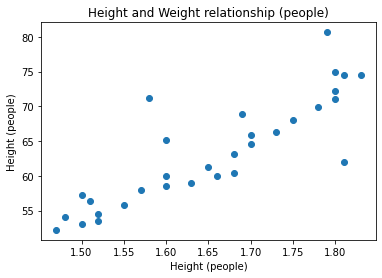

In [17]:
plt.scatter(df['Height'], df.Weight)
plt.xlabel('Height (people)')
plt.ylabel('Height (people)')
plt.title('Height and Weight relationship (people)')

In [18]:
df.Height.mean()

1.654516129032258

In [19]:
df.Weight.mean()

63.448387096774205

In [20]:
x = df.drop('Weight',axis=1)

In [21]:
x.head()

,Height
0,1.47
1,1.50
2,1.52
3,1.55
4,1.57


In [22]:
y = df['Weight']

In [23]:
y.head()

0    52.21
1    53.12
2    54.50
3    55.84
4    58.00
Name: Weight, dtype: float64

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.3, random_state=1440)

In [26]:
xtrain.shape

(21, 1)

In [27]:
ytrain.shape

(21,)

In [28]:
xtrain.head()

,Height
17,1.48
10,1.73
9,1.70
2,1.52
30,1.81


In [29]:
ytrain.head()

17    54.00
10    66.28
9     64.50
2     54.50
30    74.50
Name: Weight, dtype: float64

In [30]:
from sklearn.linear_model import LinearRegression

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps, copy_X=True, fit_path=Tru

In [31]:
reg = LinearRegression()

In [32]:
reg.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [33]:
reg.coef_

array([55.61857143])

In [34]:
reg.intercept_

-29.941119047619047

In [36]:
reg.predict([[1.5]])

array([53.4867381])

In [39]:
#y = mx+c
out = ( 55.61857143*1.5 ) + (-29.941119047619047)

In [40]:
out

53.48673809738096

In [41]:
xtest

,Height
23,1.60
28,1.79
6,1.63
27,1.70
11,1.75
18,1.51
12,1.78
25,1.58
20,1.50
16,1.80


In [42]:
pred = reg.predict(xtest)

In [43]:
pred

array([59.04859524, 69.61612381, 60.71715238, 64.61045238, 67.39138095,
       54.04292381, 69.0599381 , 57.93622381, 53.4867381 , 70.17230952])

In [44]:
from sklearn.metrics import mean_squared_error

In [45]:
mean_squared_error(ytest,pred)

38.33193894334249

Text(0.5, 1.0, 'Height and Weight relationship (people)')

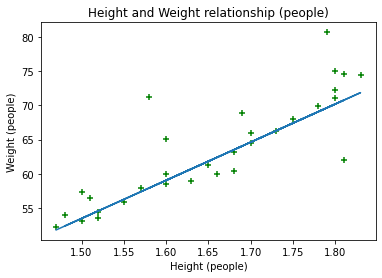

In [48]:
plt.plot(df.Height, reg.predict(x)) 
plt.scatter(df['Height'], df.Weight,marker='+',color='green') 
plt.xlabel('Height (people)') 
plt.ylabel('Weight (people)') 
plt.title('Height and Weight relationship (people)') 

In [49]:
reg.score(xtest,ytest)

0.3055420171782337